<a href="https://colab.research.google.com/github/kimheeseo/2022_AI_SW_Programmingstudy/blob/main/logistic_fullcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


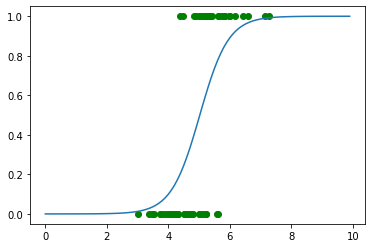

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.390325
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.229656
         Iterations 9


Species,0,1
row_0,,
0,15,7
1,3,15


In [2]:
# libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

# read data from file
df = pd.read_csv('data06_iris2.csv')
X = df.iloc[:,:-1]
Y = df['Species']

# train & test data
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.4,random_state=1) 


###########################################################
# logistic regression
###########################################################

from sklearn.linear_model import LogisticRegression

# simple logistic regression
f = LogisticRegression()
f.fit(xtrain[['Petal.Length']],ytrain)
f.coef_
f.intercept_
x = np.arange(0,10,step=0.1)
x = x.reshape((len(x),1))
yhat_prob = f.predict_proba(x)
yhat = f.predict(x)

plt.plot(xtrain[['Petal.Length']],ytrain,'go')
plt.plot(x[:,0],yhat_prob[:,1])
plt.show()

# multiple logistic regression
f = LogisticRegression()
f.fit(xtrain,ytrain)
yhat_train = f.predict(xtrain)
yhat_train_prob = f.predict_proba(xtrain)
yhat_test = f.predict(xtest)
yhat_test_prob = f.predict_proba(xtest)

pd.crosstab(ytrain,yhat_train)
pd.crosstab(ytest,yhat_test)

f.score(xtrain,ytrain)
f.score(xtest,ytest)


###########################################################
# logistic regression with StatsModels
###########################################################

import statsmodels.api as sm
X = xtrain[['Petal.Length']]
X = sm.add_constant(X)
y = ytrain
f = sm.Logit(y,X)
r = f.fit()
r.summary()

# using a full model
X = xtrain
X = sm.add_constant(X)
y = ytrain
f = sm.Logit(y,X)
r = f.fit()
r.summary()

# training set
yhat_train_prob = r.predict(X)
yhat_train = (yhat_train_prob>0.5).astype(int)
pd.crosstab(yhat_train,ytrain)

# test set
yhat_test_prob = r.predict(sm.add_constant(xtest))
yhat_test = (yhat_test_prob>0.5).astype(int)
pd.crosstab(yhat_test,ytest)